In [36]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos
file_path = 'Binance_BTCUSDT_2024_minute.csv'  # Reemplaza con la ubicación del archivo
data = pd.read_csv(file_path)

# 1. Vista general del dataset
print("Dimensiones del dataset:", data.shape)
print("Primeras filas del dataset:")
print(data.head())


Dimensiones del dataset: (473446, 10)
Primeras filas del dataset:
            Unix                 Date   Symbol      Open      High       Low  \
0  1732492740000  2024-11-24 23:59:00  BTCUSDT  97934.77  97942.70  97900.00   
1  1732492680000  2024-11-24 23:58:00  BTCUSDT  97852.18  97963.26  97833.65   
2  1732492620000  2024-11-24 23:57:00  BTCUSDT  97772.52  97852.18  97755.63   
3  1732492560000  2024-11-24 23:56:00  BTCUSDT  97812.01  97812.01  97765.11   
4  1732492500000  2024-11-24 23:55:00  BTCUSDT  97867.44  97907.77  97812.00   

      Close  Volume BTC   Volume USDT  tradecount  
0  97900.04    11.34519  1.111027e+06        2054  
1  97934.77    38.07591  3.727477e+06        3822  
2  97852.18    14.94049  1.460820e+06        2759  
3  97772.53    21.80201  2.132007e+06        2857  
4  97812.01    33.54726  3.282533e+06        4824  


In [37]:
# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())



Estadísticas descriptivas:
               Unix           Open           High            Low  \
count  4.734460e+05  473446.000000  473446.000000  473446.000000   
mean   1.718271e+12   62278.483176   62301.493686   62255.132655   
std    8.200820e+09   10482.196473   10486.834704   10477.545112   
min    1.704067e+12   38558.920000   38578.610000   38555.000000   
25%    1.711169e+12   58128.002500   58149.990000   58106.762500   
50%    1.718271e+12   63380.150000   63406.000000   63356.225000   
75%    1.725372e+12   67643.477500   67663.040000   67621.230000   
max    1.732493e+12   99547.210000   99588.010000   99497.100000   

               Close     Volume BTC   Volume USDT     tradecount  
count  473446.000000  473446.000000  4.734460e+05  473446.000000  
mean    62278.601961      24.671558  1.536193e+06    1679.660367  
std     10482.290979      39.729407  2.481339e+06    2204.164459  
min     38558.920000       0.078720  5.071142e+03      58.000000  
25%     58128.010000    

In [38]:
# 3. Información sobre tipos de datos y valores faltantes
print("\nInformación del dataset:")
print(data.info())

# 4. Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473446 entries, 0 to 473445
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unix         473446 non-null  int64  
 1   Date         473446 non-null  object 
 2   Symbol       473446 non-null  object 
 3   Open         473446 non-null  float64
 4   High         473446 non-null  float64
 5   Low          473446 non-null  float64
 6   Close        473446 non-null  float64
 7   Volume BTC   473446 non-null  float64
 8   Volume USDT  473446 non-null  float64
 9   tradecount   473446 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 36.1+ MB
None

Valores nulos por columna:
Unix           0
Date           0
Symbol         0
Open           0
High           0
Low            0
Close          0
Volume BTC     0
Volume USDT    0
tradecount     0
dtype: int64


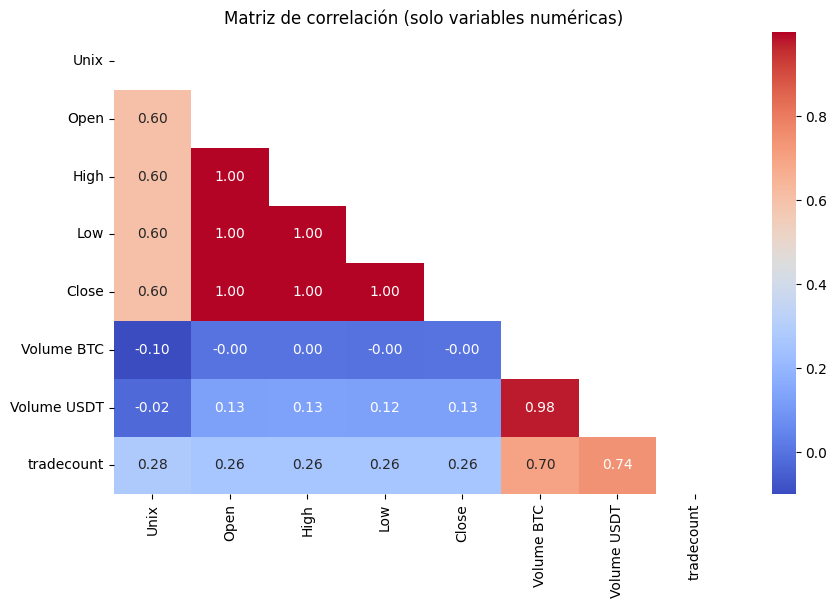

In [39]:
# 5. Análisis de correlación entre variables numéricas
# Seleccionar únicamente las columnas numéricas
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calcular la correlación para las variables numéricas
correlation_matrix = data[numerical_columns].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(correlation_matrix))
plt.title("Matriz de correlación (solo variables numéricas)")
plt.show()


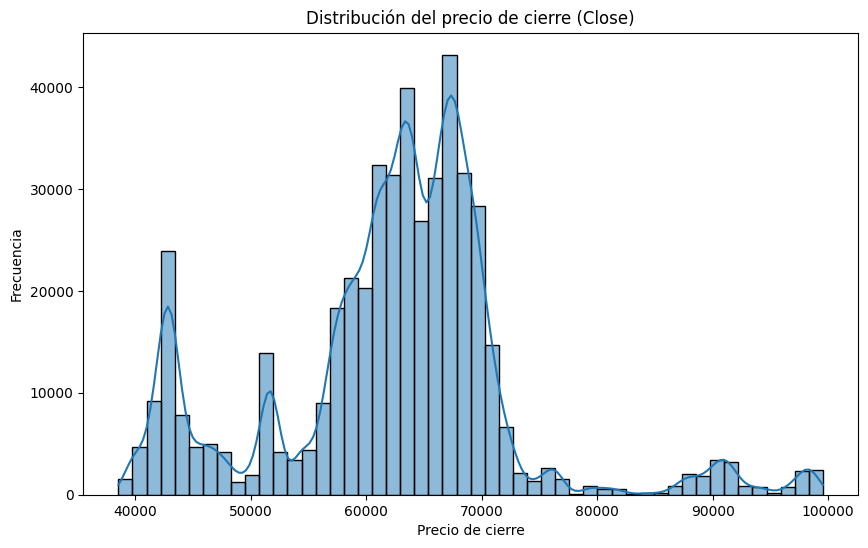

In [40]:
# 6. Distribución del precio de cierre (Close)
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], kde=True, bins=50)
plt.title("Distribución del precio de cierre (Close)")
plt.xlabel("Precio de cierre")
plt.ylabel("Frecuencia")
plt.show()

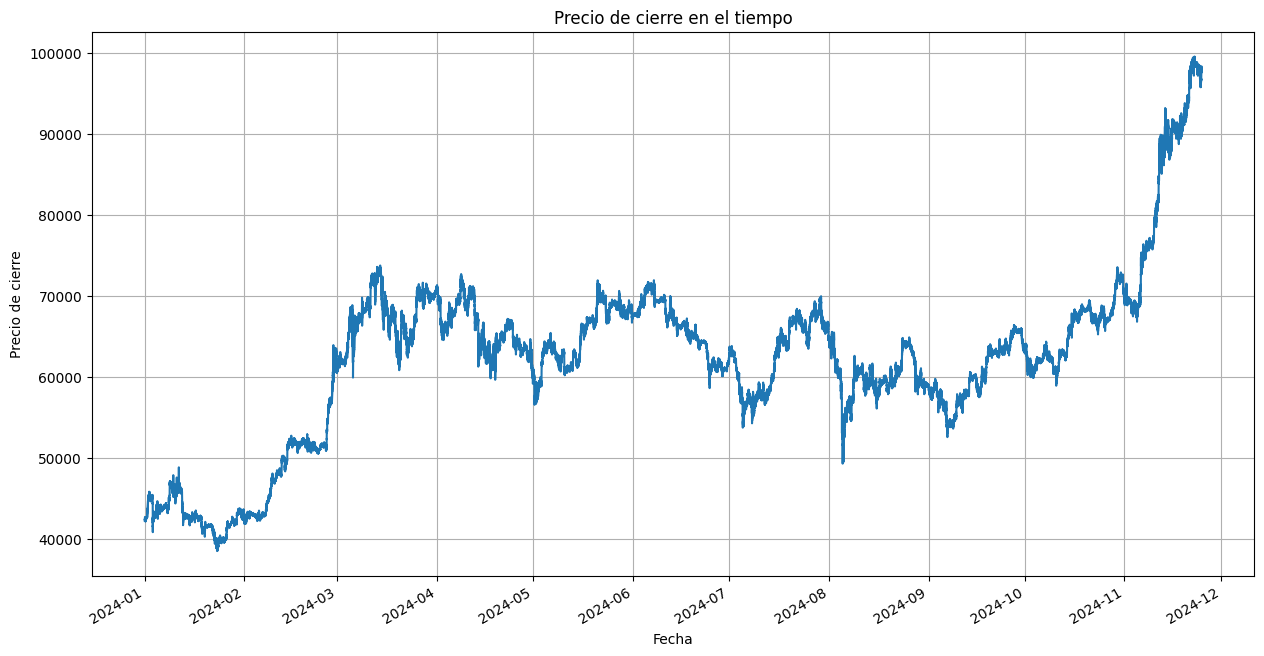

In [41]:
# 7. Análisis temporal: Precio de cierre en el tiempo
data['Date'] = pd.to_datetime(data['Date'])  # Asegurarse de que la columna Date esté en formato datetime
data.set_index('Date', inplace=True)

plt.figure(figsize=(15, 8))
data['Close'].plot()
plt.title("Precio de cierre en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.grid()
plt.show()

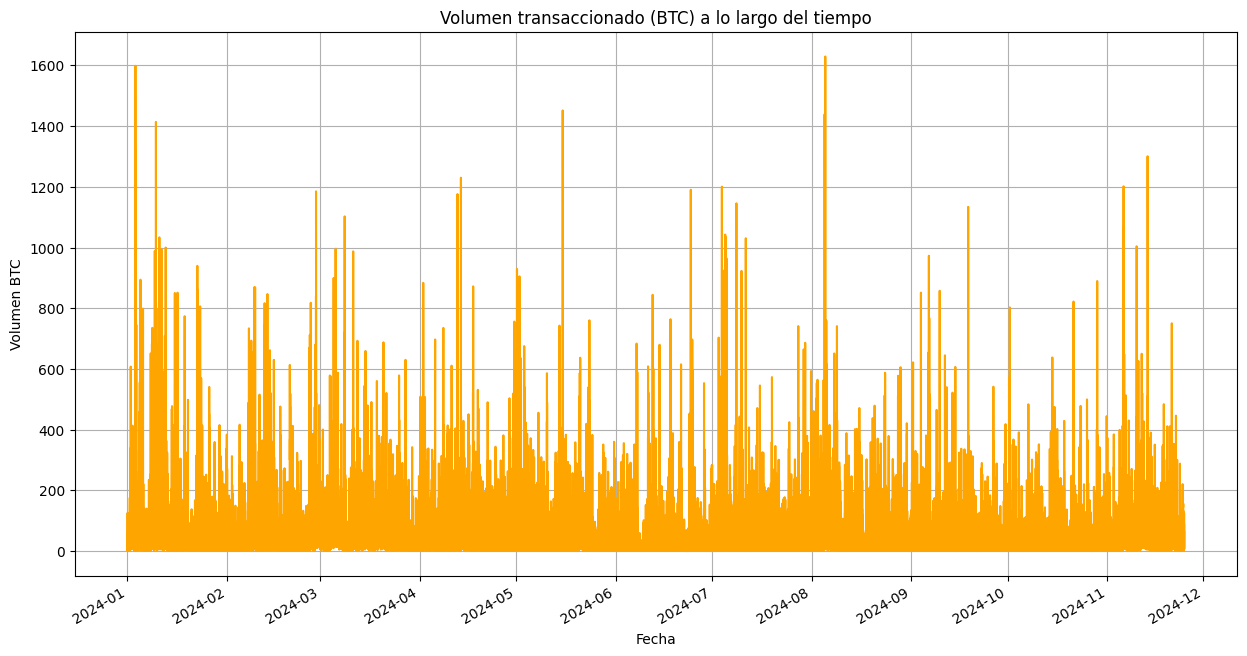

In [42]:
# 8. Volumen transaccionado (BTC) a lo largo del tiempo
plt.figure(figsize=(15, 8))
data['Volume BTC'].plot(color='orange')
plt.title("Volumen transaccionado (BTC) a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Volumen BTC")
plt.grid()
plt.show()

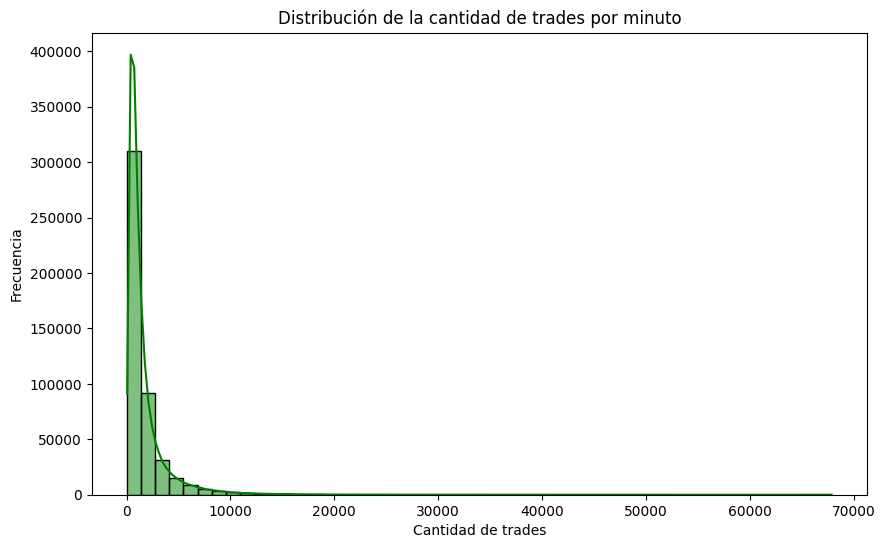

In [43]:
# 9. Análisis de la cantidad de trades por minuto
plt.figure(figsize=(10, 6))
sns.histplot(data['tradecount'], kde=True, bins=50, color="green")
plt.title("Distribución de la cantidad de trades por minuto")
plt.xlabel("Cantidad de trades")
plt.ylabel("Frecuencia")
plt.show()


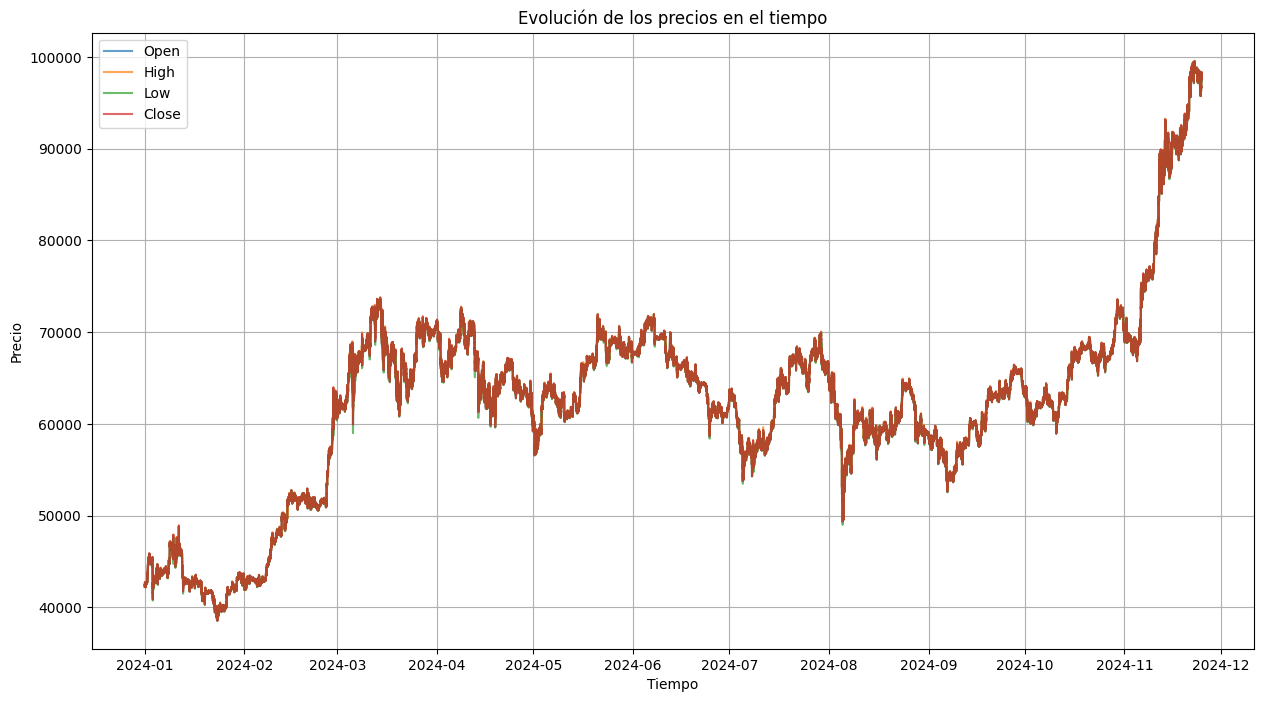

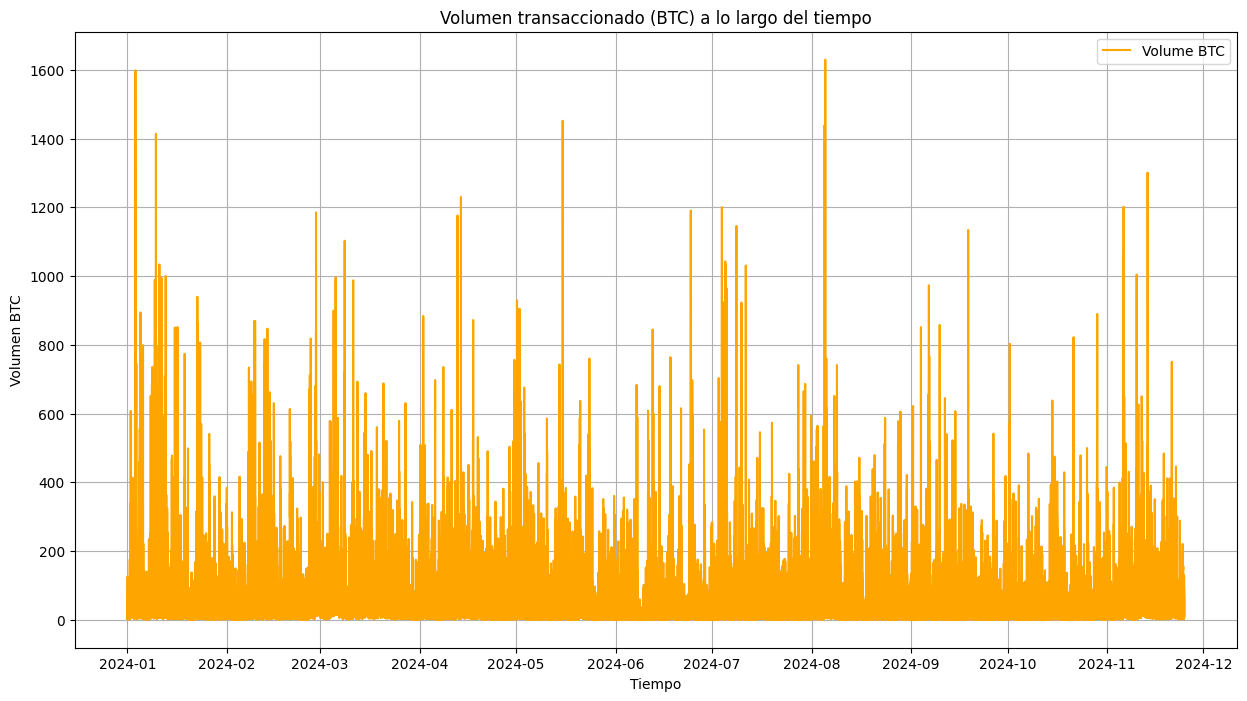

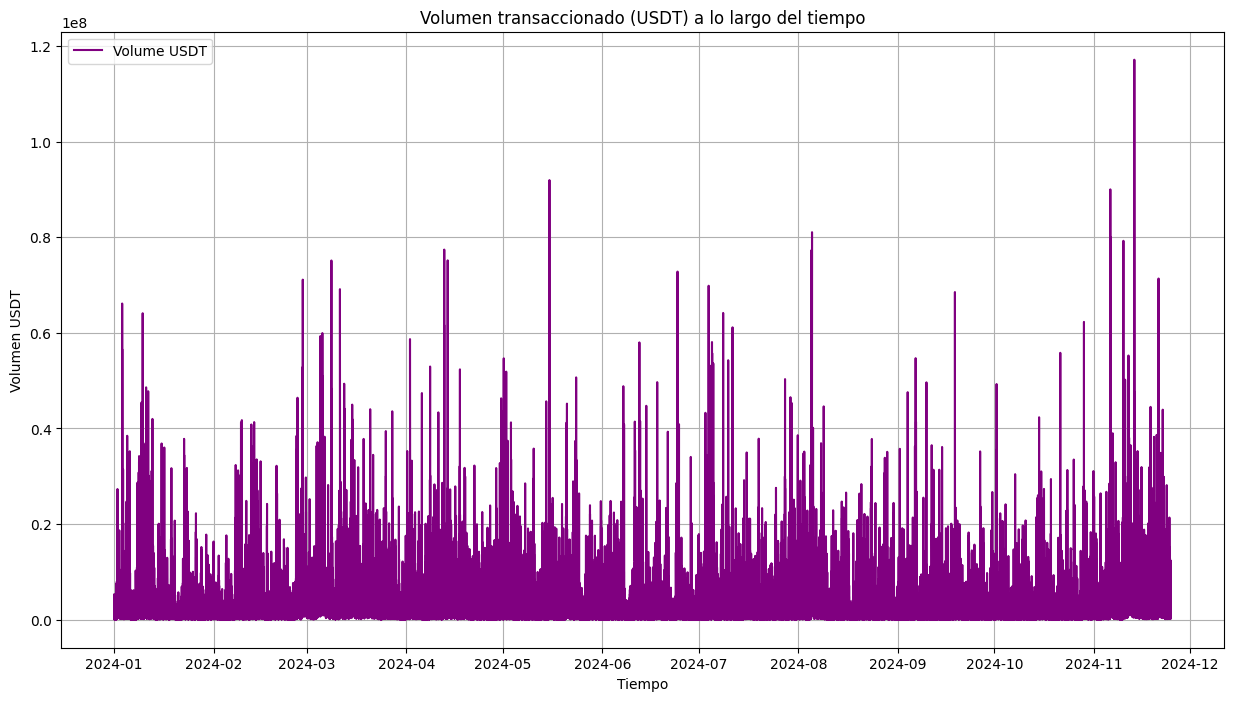

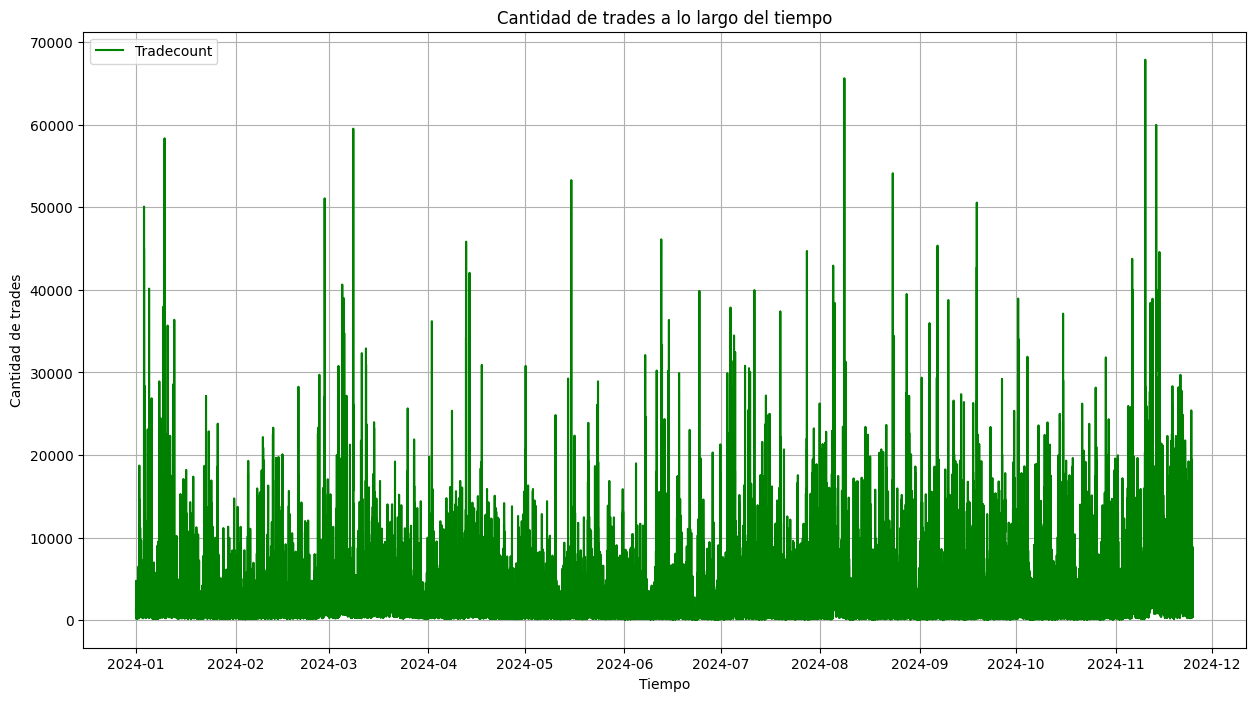

In [ ]:

# 1. Graficar el precio (Open, High, Low, Close) en torno al tiempo
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['Open'], label='Open', alpha=0.7)
plt.plot(data.index, data['High'], label='High', alpha=0.7)
plt.plot(data.index, data['Low'], label='Low', alpha=0.7)
plt.plot(data.index, data['Close'], label='Close', alpha=0.7)
plt.title("Evolución de los precios en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.show()

# 2. Graficar el volumen transaccionado en BTC a lo largo del tiempo
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['Volume BTC'], color='orange', label='Volume BTC')
plt.title("Volumen transaccionado (BTC) a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Volumen BTC")
plt.legend()
plt.grid()
plt.show()

# 3. Graficar el volumen transaccionado en USDT a lo largo del tiempo
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['Volume USDT'], color='purple', label='Volume USDT')
plt.title("Volumen transaccionado (USDT) a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Volumen USDT")
plt.legend()
plt.grid()
plt.show()

# 4. Graficar la cantidad de trades (tradecount) en torno al tiempo
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['tradecount'], color='green', label='Tradecount')
plt.title("Cantidad de trades a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de trades")
plt.legend()
plt.grid()
plt.show()


Debemos normalizar los datos dada la gran diferencia de escalas entre las variables.